# Plotting



In [41]:
!fusermount -u drive

fusermount: failed to unmount /content/drive: No such file or directory


In [42]:
from google.colab import drive
import os
path = os.getcwd()
print("My current path is:",path)
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/Colab Notebooks"
base_dir = root_dir + '/Data'

('My current path is:', '/content')
Mounted at /content/gdrive


## Plotting in `matplotlib` with `uproot`

In [43]:
!pip install uproot

## **Open Root file using Uproot and print tree variables**

In [50]:
import os
import uproot
import numpy as np
import pandas as pd
import h5py

!ls 'gdrive/My Drive/Colab Notebooks/Data'

filename = base_dir+'/ntuple_SingleMuon_Endcap_9.root'
print("Openning:",filename)

upfile = uproot.open(filename)
upfile.keys()
tree = upfile["ntupler"]["tree"] # dictionary of NumPy arrays
tree.show()


events.root	       ntuple_ggH_ZZ4mu.root		sznajder@lxplus.cern.ch
jet_images.h5	       ntuple_qqH_ZZ4mu.root
ntuple_bkg_ZZ4mu.root  ntuple_SingleMuon_Endcap_9.root
('Openning:', '/content/gdrive/My Drive/Colab Notebooks/Data/ntuple_SingleMuon_Endcap_9.root')
vh_endcap                  TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_station                 TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_ring                    TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_sector                  TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_subsector               TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_chamber                 TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_cscid                   TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_bx                      TStreamerSTL               asjagged(asdtype('>i2'), 10)
vh_type                    TStreamerSTL               asjagged(asdtype('>i2')

## **Create flattened jagged arrays of the variables to be plotted**

In [78]:
vp_pt, vp_phi, vp_eta, vt_pt, vt_phi, vt_eta, vh_size, vh_type, vh_station, vh_ring, vh_sim_phi, vh_sim_eta, vh_sim_r, vh_sim_z = tree.arrays(
                       ["vp_pt",
                        "vp_phi",
                        "vp_eta",
                        "vt_pt",
                        "vt_phi",
                        "vt_eta",
                        "vh_size",
                        "vh_type",
                        "vh_station",
                        "vh_ring",
                        "vh_sim_phi",
                        "vh_sim_eta",
                        "vh_sim_r",
                        "vh_sim_z"], outputtype=tuple)

p_pt=vp_pt.flatten()
p_phi=vp_phi.flatten()
p_eta=vp_eta.flatten()
t_pt=vt_pt.flatten()
t_phi=vt_phi.flatten()
t_eta=vt_eta.flatten()
h_size=vh_size.flatten()
h_type=vh_type.flatten()
h_station=vh_station.flatten()
h_ring=vh_ring.flatten()
h_sim_phi=vh_sim_phi.flatten()
h_sim_eta=vh_sim_eta.flatten()
h_sim_r=vh_sim_r.flatten()
h_sim_z=vh_sim_z.flatten()

print len(vh_type)
print len(vh_sim_phi)
print len(h_size)
print len(h_type)
print len(h_sim_phi)

print type(vh_size)
print type(vh_type)


20000
20000
20000
176110
176110
<type 'numpy.ndarray'>
<class 'awkward.array.jagged.JaggedArray'>


## **Plot the histograms using flattened jagged arrays**

(array([  0.,   0.,   0.,   0.,   0., 623., 590., 627., 605., 645., 648.,
        661., 582., 589., 632., 590., 639., 601., 616., 627., 645., 565.,
        593., 610., 599., 660., 599., 600., 638., 590., 641., 629., 612.,
        604., 596., 631., 602., 311.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.]),
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  ], dtype=float32),
 <a list of 1 Patch objects>)

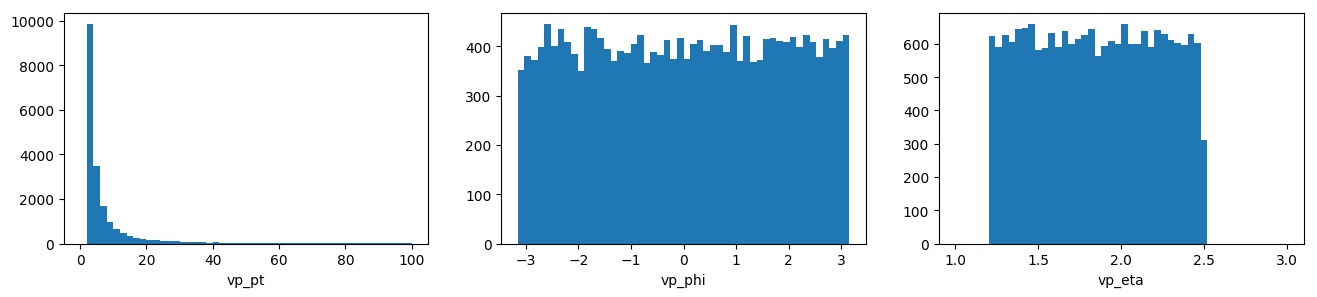

In [59]:
import matplotlib.pyplot as plt
plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(16, 3),dpi=100)

plt.subplot(1, 3, 1)
plt.xlabel("vp_pt")
plt.hist(p_pt, bins=50, range=(0.,100.), label='', histtype='stepfilled')

plt.subplot(1, 3, 2)
plt.xlabel("vp_phi")
plt.hist(p_phi, bins=50, range=(-3.15,3.15), label='', histtype='stepfilled')

plt.subplot(1, 3, 3)
plt.xlabel("vp_eta")
plt.hist(p_eta, bins=50, range=(1.,3.), label='', histtype='stepfilled')

#plt.show()


## **Example of how to superimpose histograms**

(array([   0.,    0.,    0.,    0.,    4.,  182.,  226.,  405.,  455.,
         476.,  621.,  482.,  751., 1316.,  127.,  442.,  671.,  590.,
         806.,  527.,  877.,  613., 1011.,  648.,  783.,  824.,  782.,
         941.,  822.,  970., 1040.,  490.,  961.,  626., 1000.,  439.,
          99.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
           0.,    0.,    0.,    0.,    0.]),
 array([1.  , 1.04, 1.08, 1.12, 1.16, 1.2 , 1.24, 1.28, 1.32, 1.36, 1.4 ,
        1.44, 1.48, 1.52, 1.56, 1.6 , 1.64, 1.68, 1.72, 1.76, 1.8 , 1.84,
        1.88, 1.92, 1.96, 2.  , 2.04, 2.08, 2.12, 2.16, 2.2 , 2.24, 2.28,
        2.32, 2.36, 2.4 , 2.44, 2.48, 2.52, 2.56, 2.6 , 2.64, 2.68, 2.72,
        2.76, 2.8 , 2.84, 2.88, 2.92, 2.96, 3.  ], dtype=float32),
 <a list of 1 Patch objects>)

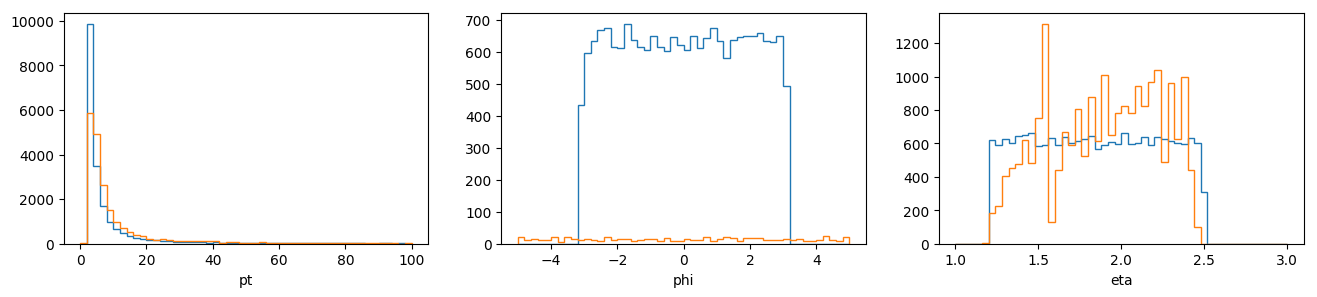

In [60]:
plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(16, 3),dpi=100)

plt.subplot(1, 3, 1)
plt.xlabel("pt")
plt.hist(p_pt, bins=50, range=(0.,100.), label='vp_pt', histtype='step')
plt.hist(t_pt, bins=50, range=(0.,100.), label='vt_pt', histtype='step')

plt.subplot(1, 3, 2)
plt.xlabel("phi")
plt.hist(p_phi, bins=50, range=(-5,5), label='vp_phi', histtype='step')
plt.hist(t_phi, bins=50, range=(-5,5), label='vt_phi', histtype='step')

plt.subplot(1, 3, 3)
plt.xlabel("eta")
plt.hist(p_eta, bins=50, range=(1.,3.), label='vp_eta', histtype='step')
plt.hist(t_eta, bins=50, range=(1.,3.), label='vt_eta', histtype='step')



## **Example of plotting imposing cuts on tree variables**

(array([32., 39., 38., 44., 45., 46., 27., 27., 20., 25., 37., 45., 37.,
        29., 19., 29., 37., 43., 42., 32., 37., 24., 42., 30., 40., 41.,
        33.,  9., 23., 21., 24., 35., 35., 30., 46., 39., 16., 31., 45.,
        47., 77., 55., 34., 36., 30., 20., 22., 44., 60., 34.]),
 array([0.   , 0.126, 0.252, 0.378, 0.504, 0.63 , 0.756, 0.882, 1.008,
        1.134, 1.26 , 1.386, 1.512, 1.638, 1.764, 1.89 , 2.016, 2.142,
        2.268, 2.394, 2.52 , 2.646, 2.772, 2.898, 3.024, 3.15 , 3.276,
        3.402, 3.528, 3.654, 3.78 , 3.906, 4.032, 4.158, 4.284, 4.41 ,
        4.536, 4.662, 4.788, 4.914, 5.04 , 5.166, 5.292, 5.418, 5.544,
        5.67 , 5.796, 5.922, 6.048, 6.174, 6.3  ], dtype=float32),
 <a list of 1 Patch objects>)

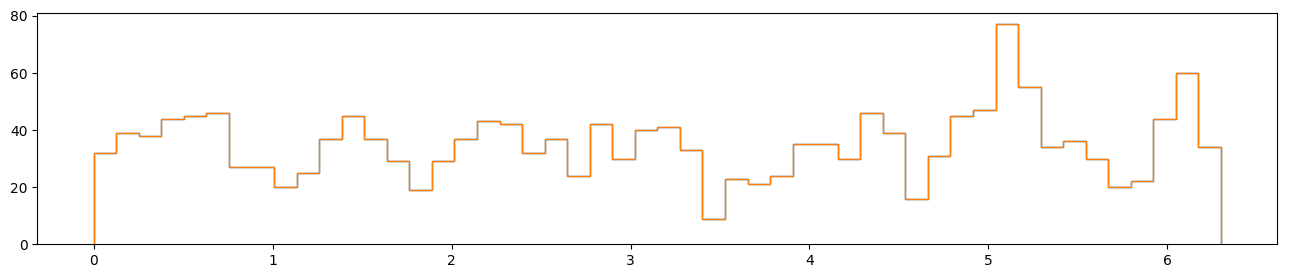

In [61]:
plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(16, 3),dpi=100)

#plt.xlabel("vp_pt")
#plt.hist(p_pt, bins=50, range=(0.,100.), label='', histtype='step')

plt.hist(h_sim_phi[h_type==1], bins=50, range=(0.,6.3), label='', histtype='step')

# Define a cuts as boolean variable
plt.hist(h_sim_phi[(h_type==1)*(h_sim_eta>0)], bins=50, range=(0.,6.3), label='', histtype='step')





## **Example of plotting using data frames**

(array([   0.,    0.,    0., 1686.,  979.,  664.,  471.,  362.,  254.,
         218.,  174.,  149.,  102.,  125.,   97.,   82.,   75.,   73.,
          59.,   42.,   56.,   44.,   28.,   30.,   34.,   29.,   23.,
          23.,   24.,   24.,   21.,   26.,   29.,   14.,   12.,   17.,
          16.,   15.,   17.,   18.,   12.,   15.,   14.,    5.,    6.,
          10.,   10.,    6.,   10.,    8.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.], dtype=float32),
 <a list of 1 Patch objects>)

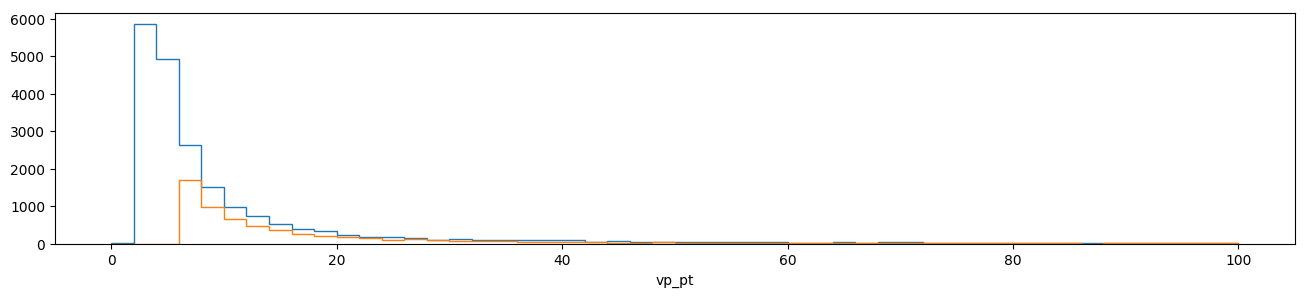

In [106]:
events_vp = tree.pandas.df(["vp_pt","vp_phi","vp_eta"],flatten=True)
events_vt = tree.pandas.df(["vt_pt","vt_phi","vt_eta"],flatten=True)

plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(16, 3),dpi=100)

plt.xlabel("vp_pt")
plt.hist(events_vt.vt_pt, bins=50, range=(0.,100.), label='', histtype='step')
plt.hist(events_vp.vp_pt[events_vp.vp_pt>6], bins=50, range=(0.,100.), label='', histtype='step')




## **Example of plotting using data frames and imposing simultaneos cuts on two different variables**

(array([32., 39., 38., 44., 45., 46., 27., 27., 20., 25., 37., 45., 37.,
        29., 19., 29., 37., 43., 42., 32., 37., 24., 42., 30., 40., 41.,
        33.,  9., 23., 21., 24., 35., 35., 30., 46., 39., 16., 31., 45.,
        47., 77., 55., 34., 36., 30., 20., 22., 44., 60., 34.]),
 array([0.   , 0.126, 0.252, 0.378, 0.504, 0.63 , 0.756, 0.882, 1.008,
        1.134, 1.26 , 1.386, 1.512, 1.638, 1.764, 1.89 , 2.016, 2.142,
        2.268, 2.394, 2.52 , 2.646, 2.772, 2.898, 3.024, 3.15 , 3.276,
        3.402, 3.528, 3.654, 3.78 , 3.906, 4.032, 4.158, 4.284, 4.41 ,
        4.536, 4.662, 4.788, 4.914, 5.04 , 5.166, 5.292, 5.418, 5.544,
        5.67 , 5.796, 5.922, 6.048, 6.174, 6.3  ], dtype=float32),
 <a list of 1 Patch objects>)

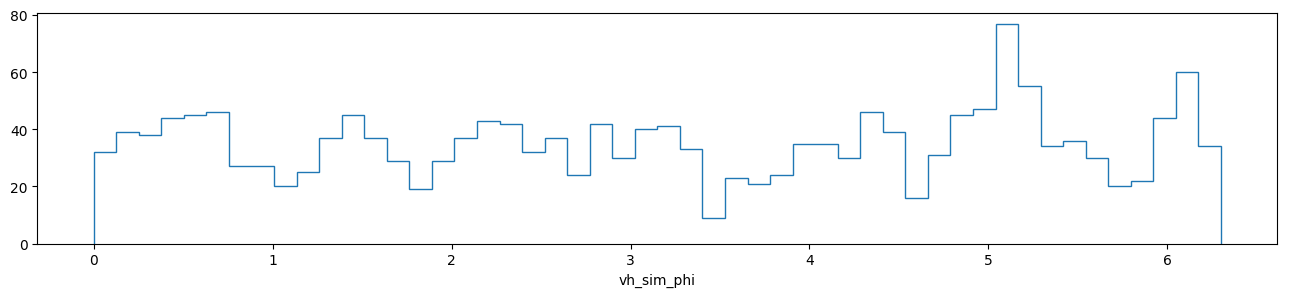

In [63]:
events_vh = tree.pandas.df(["vh_size","vh_type","vh_station","vh_ring","vh_sim_phi","vh_sim_r","vh_sim_z"],flatten=True)

plt.style.use('default') # It's ugly otherwise
plt.figure(figsize=(16, 3),dpi=100)

plt.xlabel("vh_sim_phi")
plt.hist(events_vh.vh_sim_phi[events_vh.vh_type==1][events_vh.vh_sim_z>0], bins=50, range=(0.,6.3), label='', histtype='step')


## **Example of how to iterate over tree events**

10


(array([  0.,   0.,   0.,   0.,   0., 664., 471., 362., 254., 218., 174.,
        149., 102., 125.,  97.,  82.,  75.,  73.,  59.,  42.,  56.,  44.,
         28.,  30.,  34.,  29.,  23.,  23.,  24.,  24.,  21.,  26.,  29.,
         14.,  12.,  17.,  16.,  15.,  17.,  18.,  12.,  15.,  14.,   5.,
          6.,  10.,  10.,   6.,  10.,   8.]),
 array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,
         22.,  24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,
         44.,  46.,  48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,
         66.,  68.,  70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,
         88.,  90.,  92.,  94.,  96.,  98., 100.], dtype=float32),
 <a list of 1 Patch objects>)

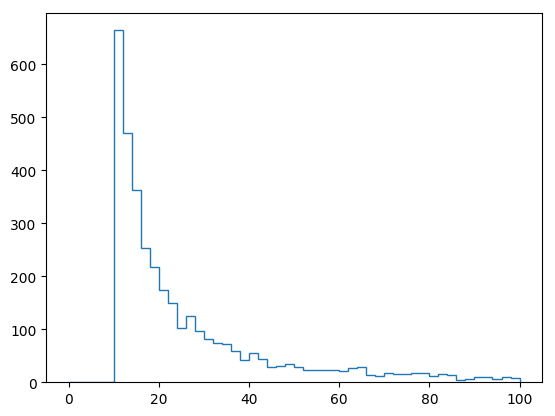

In [134]:
#for pt,eta,phi in tree.iterate(["vp_pt","vp_eta","vp_phi"],outputtype=tuple,entrysteps=10):
#  print("vp_pt=",pt)
#  print("vp_eta=",eta)
#  print("vp_phi=",phi)
 
import collections   

vars=["vp_pt","vp_eta","vp_phi","vh_size"]  
pt=[]
for event in tree.iterate(vars, outputtype=collections.namedtuple, entrysteps=10):
  p_pt =event.vp_pt.flatten()
  p_phi=event.vp_phi.flatten()
  p_eta=event.vp_eta.flatten()
  pt.extend(p_pt[(p_pt>10.)*(p_eta>0)])
  
plt.hist(pt, bins=50, range=(0.,100.), label='', histtype='step')
  

                vh_size  vh_type  ...    vh_sim_r     vh_sim_z
entry subentry                    ...                         
0     0               5        3  ...  148.167664   796.001221
      1               5        4  ...  102.584404   539.349976
      2               5        1  ...  151.367477   839.848145
      3               5        2  ...  168.546341   964.500000
      4               5        2  ...  188.013428  1054.994995
1     0               8        3  ...  196.138367   567.971252
      1               8        3  ...  263.528809   793.598755
      2               8        1  ...  209.278290   615.760864
      3               8        1  ...  322.326843   948.810364
      4               8        2  ...  355.957703   975.200012
      5               8        2  ...  355.957703  1065.694946
      6               8        3  ...  263.528809   793.598755
      7               8        1  ...  322.326843   948.810364
2     0              20        3  ...  222.753204   565

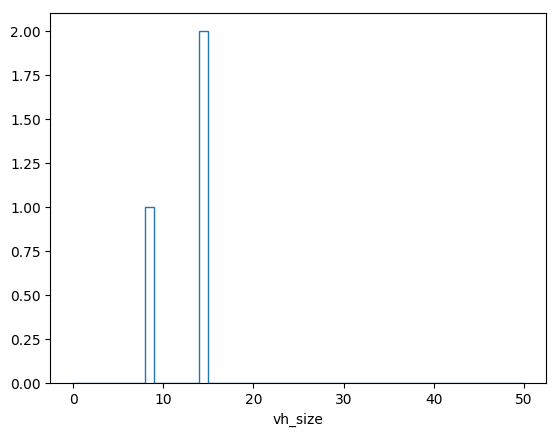

In [143]:

event = tree.pandas.df(["vh_size","vh_type","vh_station","vh_ring","vh_sim_phi","vh_sim_r","vh_sim_z"],flatten=True,entrystop=10)
print(event)
plt.xlabel("vh_size")
plt.hist(event.vh_size[event.vh_type==1][event.vh_station==1][event.vh_ring==2], bins=50, range=(0.,50.), label='', histtype='step')

print type(h_size)
print type(h_type)

#plt.hist(h_size[(h_type==1)*(h_station==1)*(h_ring==2)], bins=50, range=(0.,6.3), label='', histtype='step')

